<a href="https://colab.research.google.com/github/smitasahu2/Teaching-2023/blob/main/NN_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports:
tensorflow (as tf): Deep learning framework used to create and train neural networks.
Defining the Ordinary Differential Equation (ODE):
model(y, t): Function that defines the ordinary differential equation
$$\frac{dy}{dt} = -2y, y(0) = 1 ~ \text{on} ~[0, 2]$$

#Exact Solution Function:
exact_solution(t, C): Function that computes the exact solution of the differential equation using the formula
$$y(t) = C\exp(-2t)$$
where C is a constant.
This function takes the time t and the constant C as arguments and returns the corresponding exact solution.
#Generating Data:
and setting domian [0,2]
#Solving the ODE using odeint:
`y_true = odeint(model, y0, t)`
* Using odeint to solve the ODE defined by model with the initial condition y0 over the time points t.
* y_true contains the true solution obtained by solving the ODE.

#Defining the Neural Network:
To define a neural network in Python using TensorFlow's Keras API, use the following code:
```python
# Define a neural network using TensorFlow's Keras API
model = tf.keras.Sequential([
    # Add layers here (e.g., Dense layers, activation functions, etc.)
    # Example: tf.keras.layers.Dense(units=2, activation='tanh', input_shape=(1,))
    #        tf.keras.layers.Dense(units=1)
])
```
It's important to note that this neural network is used to approximate the solution of the differential equation.

#Compiling the Model:
model.compile(optimizer='adam', loss='mean_squared_error')

Compiling the neural network model with the Adam optimizer and using mean squared error as the loss function.
Given the predicted values $\hat{y}_i$ and the actual (true) values $y_i$
for $n$ samples, the mean squared error is calculated as:
$$
MSE =\frac{1}{n}\sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2$$
In the context of the neural network model compilation with TensorFlow's Keras API using the Adam optimizer and mean squared error as the loss function, the mathematical equation for the loss function would be the mean squared error as described above:
$$
\text{Loss}
= \frac{1}{n}\sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2$$
Here,$$\hat{y}_i$$ represents the predicted output of the neural network for the $i^{\text{th}}$ sample, and $y_i$ represents the actual target output for the $i^{\text{th}}$ sample. The loss is computed as the average of the squared differences between predicted and actual values over all samples.

#Training the Neural Network:
`model.fit(t, y_true, epochs=1000, verbose=0)`

Let's break down each component:
* model: This refers to the neural network model created using TensorFlow's Keras API. This model has been previously defined with layers, activation functions, and other configurations.

* fit: The fit method in TensorFlow is used to train the model. It takes in the input data and the corresponding target values (labels) to adjust the model's parameters (weights and biases) to minimize the defined loss function.
* t: This represents the input data (features) used for training the neural network. In the context of this example, t likely represents the time points or independent variable values used for solving the differential equation.
* y_true: These are the true or target values that the model tries to approximate or predict. In this case, y_true contains the true solution obtained by solving the ordinary differential equation using a numerical method (odeint in this case) for the given time points (t).
* epochs=1000: An epoch is a single pass through the entire training dataset. In this case, the training process will go through the dataset (given by t and y_true) 1000 times, adjusting the model's weights and biases in each iteration to minimize the defined loss function.
* verbose=0: This parameter controls the verbosity during training. Setting verbose=0 means that the training progress will not be displayed in the output. If set to 1 or True, it would show the training progress for each epoch.
* The training process involves the following steps:
   * Forward Pass: The neural network takes the input data (t) and makes predictions (y_pred) based on its current weights.

   * Loss Calculation: The difference between the predicted values (y_pred) and the true values (y_true) is calculated using the defined loss function (such as mean squared error in this case).
   * Backpropagation: The model uses an optimization algorithm (in this case, likely the Adam optimizer, specified during model compilation) to adjust its internal parameters (weights and biases) in a way that minimizes the calculated loss.
   * Epochs: The process of forward pass, loss calculation, and backpropagation is repeated for the specified number of epochs (1000 in this case), iteratively refining the model's parameters to improve its predictions.
* By executing model.fit(t, y_true, epochs=1000, verbose=0), the neural network undergoes training to learn the patterns in the given data (t) and corresponding true solutions (y_true) in order to approximate the behavior of the differential equation.
Training the neural network by fitting it to the true solution (y_true) obtained from odeint.

# Predicting with the Trained Neural Network:
`y_pred = model.predict(t)`

Using the trained neural network to predict the solution for the given time points t.

# Plotting the Solutions:
exact and nueral network solution

# Using fourth order Runge-Kutta method to solve given ode

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def dy_dt(y, t):
    return -2 * y

def runge_kutta_4(y0, t0, t_end, h):
    num_steps = int((t_end - t0) / h)
    t = np.linspace(t0, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y0

    for i in range(num_steps):
        k1 = h * dy_dt(y[i], t[i])
        k2 = h * dy_dt(y[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * dy_dt(y[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * dy_dt(y[i] + k3, t[i] + h)

        y[i+1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y

# Define initial conditions and parameters
y0 = 1
t0 = 0.0
t_end = 2.0
h = 0.1  # Step size
# Runge-Kutta 4th order method
t_rk4, y_rk4 = runge_kutta_4(y0, t0, t_end, h)

#Exact solution

In [36]:
# Exact solution function
def exact_solution(t, C):
    return C * np.exp(-2 * t)

In [37]:
import tensorflow as tf
from scipy.integrate import odeint

def model(y, t):
    return -2 * y

# Generate data
t = np.linspace(0, 2, 101)  # Time points
y0 = np.array([1.])  # Initial condition y(0) = 1

# Solve the ODE using scipy's odeint as a reference
y_true = odeint(model, y0, t)

# Exact solution with the constant C determined by the initial condition y(0) = 0
C = y0[0]
y_exact = exact_solution(t, C)

# Define a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network to approximate the solution
model.fit(t, y_true, epochs=1000, verbose=0)

# Predict using the trained neural network
y_pred = model.predict(t)



4/4 [==============================] - 0s 5ms/step


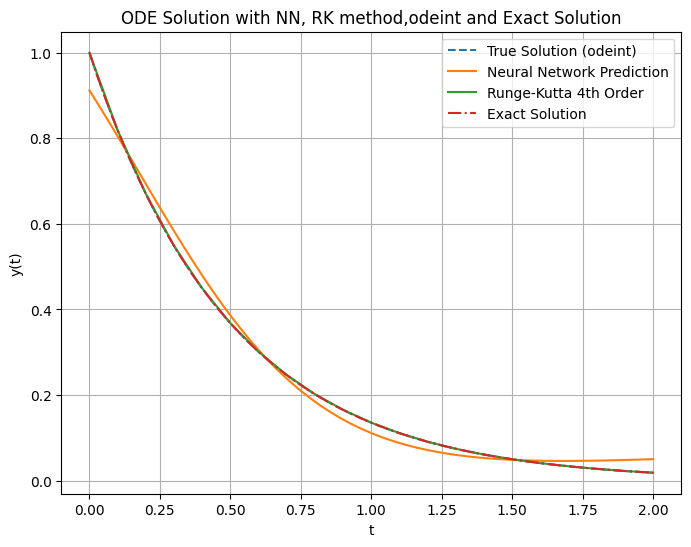

In [38]:
# Plot the solutions
plt.figure(figsize=(8, 6))
plt.plot(t, y_true, label='True Solution (odeint)', linestyle='--')
plt.plot(t, y_pred, label='Neural Network Prediction')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order')
plt.plot(t, y_exact, label='Exact Solution', linestyle='-.')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('ODE Solution with NN, RK method,odeint and Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

# I am comparing the results by increasing number of hidden layer

In [ ]:
def model_equation(y, t):
    return -2 * y

def create_model(num_layers):
    layers = [tf.keras.layers.Dense(1, activation='tanh', input_shape=(1,))]
    for _ in range(num_layers):
        layers.append(tf.keras.layers.Dense(3, activation='tanh'))
    layers.append(tf.keras.layers.Dense(1))
    return tf.keras.Sequential(layers)

def solve_and_compare(num_layers):
    t = np.linspace(0, 2, 101)
    y0 = np.array([1.])

    y_true = odeint(model_equation, y0, t)

    nn_model = create_model(num_layers)
    nn_model.compile(optimizer='adam', loss='mean_squared_error')
    nn_model.fit(t, y_true, epochs=1000, verbose=0)

    y_pred = nn_model.predict(t)

    return t, y_true, y_pred


4/4 [==============================] - 0s 3ms/step


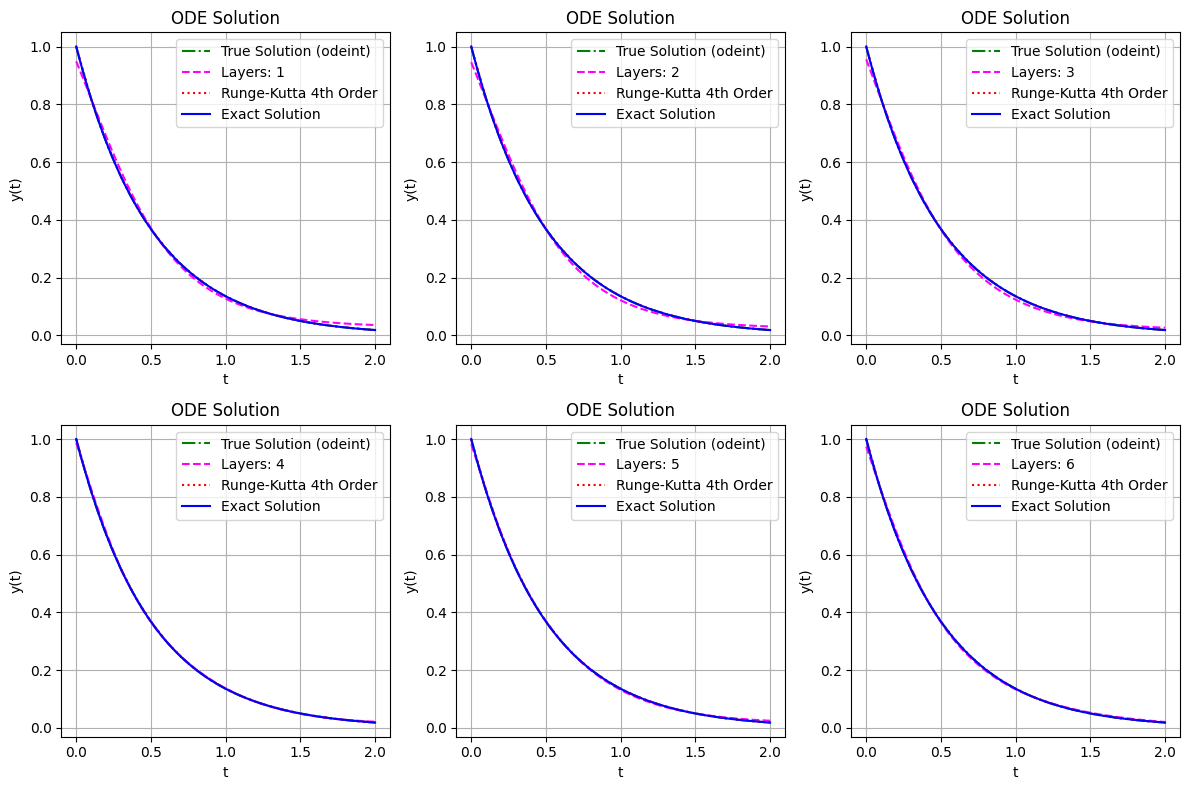

In [47]:
num_layers_to_test = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(12, 8))

for i, num_layers in enumerate(num_layers_to_test, start=1):
    t, y_true, y_pred = solve_and_compare(num_layers)

    plt.subplot(2, 3, i)
    plt.plot(t, y_true, label='True Solution (odeint)', linestyle='-.', color='green')
    plt.plot(t, y_pred, label=f'Layers: {num_layers}', linestyle='--', color='magenta')
    plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order', linestyle=':', color='red')
    plt.plot(t, y_exact, label='Exact Solution', linestyle='-', color='blue')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('ODE Solution')
    plt.legend()
    plt.grid(True)


plt.tight_layout()
plt.show()

Here are some reasons why the hyperbolic tangent activation function might be chosen:

1. Range of Output: The tanh function outputs values in the range (-1, 1), making it useful for normalization or scaling of the data between -1 and 1.
This can help stabilize the learning process.
2. Non-linearity: Like other activation functions (such as ReLU, sigmoid, etc.), tanh introduces non-linearity into the network, enabling it to learn complex relationships within the data.
3. Vanishing Gradient: While tanh suffers from the vanishing gradient problem similar to the sigmoid function, it has a more favorable range in terms of centering around zero, which might aid in training compared to sigmoid in some cases.
4. Historical Usage: Tanh has been historically used in neural networks and has shown effectiveness in certain contexts.

However, it's important to note that activation functions like ReLU (Rectified Linear Unit) have become more popular in recent years due to their simplicity and reduced likelihood of the vanishing gradient problem. ReLU tends to perform well in many scenarios and is often a default choice for hidden layers in deep neural networks.

Experimentation and tuning are essential in choosing the appropriate activation function. One might try various activation functions and architectures to determine which one performs best for a specific problem. The choice of activation function can significantly impact the network's learning capability and convergence speed.